# Project Introduction

This project aims to analyse Montgomery County’s crime dataset, to identify key patterns and trends, and raise contextual risk causes. This is so that insights, recommendations and strategies could be provided to reduce the incidence of crime, ultimately increasing public safety in the County

# Problem Statement

The MCPD has the resources and the inter-agency relationships to patrol communities, investigate incidents, and disrupt criminal activity; however, due to an ever-changing crime landscape, there are still question marks over which categories of crime will increase or decrease from month to month or year to year. It is also hard to determine with precision where the hotspots are within each police district, which limits the ability to design targeted interventions. The dataset is also limited regarding which crimes have the most impact on victims; a concerning oversight.
These limitations relate to a problem in the quality of the dataset itself: missing values, inconsistent column headers, improper data types, and geographic coordinates that are not accurate collectively undermine confidence in any conclusions drawn from the data.

# Research Questions

1. What is the geographical composition of the county, by police district?
2. Which crimes impact victims the most?
3. Which offence code records the highest crime entries, and which city are they occurring?
4. How has the overall crime frequency evolved between 2018 and 2022, and what seasonal or monthly patterns can be observed during this period?
5. How does crime composition differ across agencies and time?

# Project Objectives

1. To spatially map out the geographical boundaries of all police districts in Montgomery County.
2. To identify the top three crime categories that most severely affect victims by analysing crime frequency and severity indicators within the dataset.
3. Determine the city that records the highest number of incidents under offence code 2305 by performing city level counts and comparisons.
4. To analyze the monthly and yearly crime trends from 2018 to 2022 for any major increases, decreases, or seasonal patterns within that time period.

# Dataset

Police officers in the county file dispatched incident reports. The MCPD Records Division receives, verifies and codes those reports and maintains the department’s records. These records are in the public domain on their website and contain detailed records of reported crimes between the years 2018 and 2022. The data is in a structured format as a CSV file where each row represents a reported crime and each column represents specific information about the incident for example, date, time, location, police district etc.


In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import numpy as np

In [6]:
# upload dataset
df1=pd.read_csv('Crime_Dataset_Coursework1-1.csv', low_memory=False)
df1

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,...,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,08/23/2018 09:52:00 PM,NaN,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,03/30/2018 01:01:00 AM,NaN,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,06/14/2018 10:26:00 PM,06/15/2018 03:00:00 AM,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,09/02/2018 11:30:00 PM,09/03/2018 12:30:00 AM,38.966174,-77.096561,2D,"(38.9662, -77.0966)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306089,201320571,1399,210006666,02/21/2021 07:25:28 AM,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,NaN,TRANSHIRE,NaN,RD,02/20/2021 08:00:00 PM,NaN,39.172701,-77.197340,6D,"(39.1727, -77.1973)"
306090,201329875,2305,210017101,05/06/2021 10:54:47 PM,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,NaN,ATHERTON,NaN,DR,05/06/2021 03:15:00 AM,NaN,39.059672,-77.075995,4D,"(39.0597, -77.076)"
306091,201329751,5016,210016952,05/05/2021 10:38:58 PM,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,NaN,BALTUSROL,NaN,DR,05/05/2021 10:38:00 PM,NaN,39.199722,-77.273039,5D,"(39.1997, -77.273)"
306092,201323117,9099,210009468,03/13/2021 12:07:14 PM,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,...,NaN,FENTON,NaN,ST,03/13/2021 01:35:00 PM,NaN,38.985813,-77.022915,3D,"(38.9858, -77.0229)"


In [7]:
# Derive column information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306094 entries, 0 to 306093
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             306094 non-null  int64  
 1   Offence Code            306094 non-null  object 
 2   CR Number               306094 non-null  int64  
 3   Dispatch Date / Time    257065 non-null  object 
 4   NIBRS Code              306094 non-null  object 
 5   Victims                 306094 non-null  int64  
 6   Crime Name1             305822 non-null  object 
 7   Crime Name2             305822 non-null  object 
 8   Crime Name3             305822 non-null  object 
 9   Police District Name    306000 non-null  object 
 10  Block Address           279888 non-null  object 
 11  City                    304818 non-null  object 
 12  State                   306094 non-null  object 
 13  Zip Code                302915 non-null  float64
 14  Agency              

## Data Cleaning and Initial Data Analysis

In [8]:
df1.columns.tolist()

['Incident ID',
 'Offence Code',
 'CR Number',
 'Dispatch Date / Time',
 'NIBRS Code',
 'Victims',
 'Crime Name1',
 'Crime Name2',
 'Crime Name3',
 'Police District Name',
 'Block Address',
 'City',
 'State',
 'Zip Code',
 'Agency',
 'Place',
 'Sector',
 'Beat',
 'PRA',
 'Address Number',
 'Street Prefix',
 'Street Name',
 'Street Suffix',
 'Street Type',
 'Start_Date_Time',
 'End_Date_Time',
 'Latitude',
 'Longitude',
 'Police District Number',
 'Location']

In [9]:
df1.columns = df1.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')   #Standardize columns

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306094 entries, 0 to 306093
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident_ID             306094 non-null  int64  
 1   Offence_Code            306094 non-null  object 
 2   CR_Number               306094 non-null  int64  
 3   Dispatch_Date_/_Time    257065 non-null  object 
 4   NIBRS_Code              306094 non-null  object 
 5   Victims                 306094 non-null  int64  
 6   Crime_Name1             305822 non-null  object 
 7   Crime_Name2             305822 non-null  object 
 8   Crime_Name3             305822 non-null  object 
 9   Police_District_Name    306000 non-null  object 
 10  Block_Address           279888 non-null  object 
 11  City                    304818 non-null  object 
 12  State                   306094 non-null  object 
 13  Zip_Code                302915 non-null  float64
 14  Agency              

### Change data types

In [11]:
# Change Dispatch_Date_time to time series 
df1['Start_Date_Time']=pd.to_datetime(df1['Start_Date_Time'],format='%m/%d/%Y %I:%M:%S %p')
df1['End_Date_Time']=pd.to_datetime(df1['End_Date_Time'],format='%m/%d/%Y %I:%M:%S %p')
df1

,Incident_ID,Offence_Code,CR_Number,Dispatch_Date_/_Time,NIBRS_Code,Victims,Crime_Name1,Crime_Name2,Crime_Name3,Police_District_Name,...,Street_Prefix,Street_Name,Street_Suffix,Street_Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police_District_Number,Location
0,201202980,3550,180042096,08/23/2018 09:52:08 PM,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,2018-08-23 21:52:00,NaT,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaT,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,03/30/2018 01:00:55 AM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaT,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,06/14/2018 10:26:45 PM,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,2018-06-14 22:26:00,2018-06-15 03:00:00,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,09/03/2018 12:06:54 PM,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,2018-09-02 23:30:00,2018-09-03 00:30:00,38.966174,-77.096561,2D,"(38.9662, -77.0966)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306089,201320571,1399,210006666,02/21/2021 07:25:28 AM,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,NaN,TRANSHIRE,NaN,RD,2021-02-20 20:00:00,NaT,39.172701,-77.197340,6D,"(39.1727, -77.1973)"
306090,201329875,2305,210017101,05/06/2021 10:54:47 PM,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,NaN,ATHERTON,NaN,DR,2021-05-06 03:15:00,NaT,39.059672,-77.075995,4D,"(39.0597, -77.076)"
306091,201329751,5016,210016952,05/05/2021 10:38:58 PM,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,NaN,BALTUSROL,NaN,DR,2021-05-05 22:38:00,NaT,39.199722,-77.273039,5D,"(39.1997, -77.273)"
306092,201323117,9099,210009468,03/13/2021 12:07:14 PM,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,...,NaN,FENTON,NaN,ST,2021-03-13 13:35:00,NaT,38.985813,-77.022915,3D,"(38.9858, -77.0229)"


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306094 entries, 0 to 306093
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Incident_ID             306094 non-null  int64         
 1   Offence_Code            306094 non-null  object        
 2   CR_Number               306094 non-null  int64         
 3   Dispatch_Date_/_Time    257065 non-null  object        
 4   NIBRS_Code              306094 non-null  object        
 5   Victims                 306094 non-null  int64         
 6   Crime_Name1             305822 non-null  object        
 7   Crime_Name2             305822 non-null  object        
 8   Crime_Name3             305822 non-null  object        
 9   Police_District_Name    306000 non-null  object        
 10  Block_Address           279888 non-null  object        
 11  City                    304818 non-null  object        
 12  State                   306094

In [13]:
df1['Dispatch_Date_/_Time']=pd.to_datetime(df1['Dispatch_Date_/_Time'], errors='coerce', format='%m/%d/%Y %I:%M:%S %p')

Columns have some bad date formats

In [14]:
bad_rows = df1[pd.to_datetime(df1['Dispatch_Date_/_Time'], errors='coerce').isna()] # rows with corrupted formats
bad_rows.head(30)


,Incident_ID,Offence_Code,CR_Number,Dispatch_Date_/_Time,NIBRS_Code,Victims,Crime_Name1,Crime_Name2,Crime_Name3,Police_District_Name,...,Street_Prefix,Street_Name,Street_Suffix,Street_Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police_District_Number,Location
6,201121509,5213,17008780,NaT,520,1,Crime Against Society,Weapon Law Violations,WEAPON - FIRING,WHEATON,...,NaN,PUNCH,NaN,ST,2017-02-18 00:18:00,NaT,39.088902,-77.042262,4D,"(39.0889, -77.0423)"
7,201091648,1103,16038843,NaT,11A,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,WHEATON,...,NaN,BEL PRE,NaN,RD,2016-07-31 23:00:00,2016-08-01 05:32:00,39.093783,-77.076369,4D,"(39.0938, -77.0764)"
8,201108886,1399,16060247,NaT,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,...,NaN,NORTHAMPTON,NaN,DR,2016-11-20 09:00:00,NaT,39.008359,-76.985601,3D,"(39.0084, -76.9856)"
9,201124327,9199,17012248,NaT,90Z,1,Other,All Other Offenses,POLICE INFORMATION,WHEATON,...,NaN,GEORGIA,NaN,AVE,2017-03-08 14:03:00,NaT,39.036218,-77.049887,4D,"(39.0362, -77.0499)"
10,201096093,2399,16044222,NaT,23H,1,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),WHEATON,...,NaN,ROWLAND,NaN,LA,2016-08-28 00:00:00,2016-08-29 00:00:00,39.110690,-76.962918,4D,"(39.1107, -76.9629)"
11,201113407,2303,16066213,NaT,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,MONTGOMERY VILLAGE,...,NaN,WASHINGTONIAN,NaN,BLV,2016-12-24 15:51:00,2016-12-24 16:37:00,39.114194,-77.197117,6D,"(39.1142, -77.1971)"
15,201114124,1399,16067054,NaT,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,WHEATON,...,NaN,WOOLEN OAK,NaN,CT,2016-12-17 22:44:00,2016-12-29 00:00:00,39.108360,-77.057510,4D,"(39.1084, -77.0575)"
25,201166702,9105,170547908,NaT,90Z,1,Other,All Other Offenses,LOST PROPERTY,SILVER SPRING,...,NaN,HAMPSHIRE GREEN,NaN,LA,2017-12-11 00:00:00,NaT,39.015143,-76.976145,3D,"(39.0151, -76.9761)"
39,201091655,1103,16038243,NaT,11A,1,Crime Against Person,Forcible Rape,RAPE - STRONG-ARM,ROCKVILLE,...,NaN,ST JAMES,NaN,RD,2016-07-28 14:00:00,NaT,39.056273,-77.205623,1D,"(39.0563, -77.2056)"
40,201102170,3699,16041077,NaT,11D,1,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,SILVER SPRING,...,NaN,CROSSWOOD,NaN,CT,2016-08-13 12:21:00,NaT,39.096173,-76.923480,3D,"(39.0962, -76.9235)"


## Duplicates

In [15]:
# Utilize the function .duplicated() to check column or dataframe for duplicates
# You can add .any() to scan across a dataframe to locate duplicate values. Returns True or False to that effect
# Use drop_duplicates() to remove ALL duplicates

df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
306089    False
306090    False
306091    False
306092    False
306093    False
Length: 306094, dtype: bool

In [16]:
df1.duplicated().any()  # check for duplicates in row or columns

np.False_

### Drop duplicates

In [17]:
# Drop all duplicates
df1=df1.drop_duplicates()
df1

,Incident_ID,Offence_Code,CR_Number,Dispatch_Date_/_Time,NIBRS_Code,Victims,Crime_Name1,Crime_Name2,Crime_Name3,Police_District_Name,...,Street_Prefix,Street_Name,Street_Suffix,Street_Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police_District_Number,Location
0,201202980,3550,180042096,2018-08-23 21:52:08,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,NaN,MIDDLEBROOK,NaN,RD,2018-08-23 21:52:00,NaT,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaT,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,NaN,WOODMONT,NaN,AVE,2018-03-30 01:01:00,NaT,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,2018-06-14 22:26:45,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,NaN,QUINCE ORCHARD,NaN,RD,2018-06-14 22:26:00,2018-06-15 03:00:00,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,2018-09-03 12:06:54,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,NaN,FALSTONE,NaN,AVE,2018-09-02 23:30:00,2018-09-03 00:30:00,38.966174,-77.096561,2D,"(38.9662, -77.0966)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306089,201320571,1399,210006666,2021-02-21 07:25:28,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,NaN,TRANSHIRE,NaN,RD,2021-02-20 20:00:00,NaT,39.172701,-77.197340,6D,"(39.1727, -77.1973)"
306090,201329875,2305,210017101,2021-05-06 22:54:47,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,NaN,ATHERTON,NaN,DR,2021-05-06 03:15:00,NaT,39.059672,-77.075995,4D,"(39.0597, -77.076)"
306091,201329751,5016,210016952,2021-05-05 22:38:58,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,NaN,BALTUSROL,NaN,DR,2021-05-05 22:38:00,NaT,39.199722,-77.273039,5D,"(39.1997, -77.273)"
306092,201323117,9099,210009468,2021-03-13 12:07:14,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,...,NaN,FENTON,NaN,ST,2021-03-13 13:35:00,NaT,38.985813,-77.022915,3D,"(38.9858, -77.0229)"


## Remove unnecessary columns

In [18]:
df1=df1.drop(['Street_Suffix', 'Street_Prefix', 'End_Date_Time'], axis=1)  #Drop empty and unnecessary columns
df1

,Incident_ID,Offence_Code,CR_Number,Dispatch_Date_/_Time,NIBRS_Code,Victims,Crime_Name1,Crime_Name2,Crime_Name3,Police_District_Name,...,Beat,PRA,Address_Number,Street_Name,Street_Type,Start_Date_Time,Latitude,Longitude,Police_District_Number,Location
0,201202980,3550,180042096,2018-08-23 21:52:08,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,5N1,447,12800.0,MIDDLEBROOK,RD,2018-08-23 21:52:00,39.177744,-77.265619,5D,"(39.1777, -77.2656)"
1,201181293,3522,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,2E2,054,8300.0,WOODMONT,AVE,2018-03-30 01:01:00,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
2,201181293,3562,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,2E2,054,8300.0,WOODMONT,AVE,2018-03-30 01:01:00,38.992693,-77.097063,2D,"(38.9927, -77.0971)"
3,201193163,3520,180029476,2018-06-14 22:26:45,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,6P2,445,400.0,QUINCE ORCHARD,RD,2018-06-14 22:26:00,39.147954,-77.218189,6D,"(39.148, -77.2182)"
4,201204355,2204,180043926,2018-09-03 12:06:54,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,2E1,017,4800.0,FALSTONE,AVE,2018-09-02 23:30:00,38.966174,-77.096561,2D,"(38.9662, -77.0966)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306089,201320571,1399,210006666,2021-02-21 07:25:28,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,6R2,544,19300.0,TRANSHIRE,RD,2021-02-20 20:00:00,39.172701,-77.197340,6D,"(39.1727, -77.1973)"
306090,201329875,2305,210017101,2021-05-06 22:54:47,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,4K2,333,12500.0,ATHERTON,DR,2021-05-06 03:15:00,39.059672,-77.075995,4D,"(39.0597, -77.076)"
306091,201329751,5016,210016952,2021-05-05 22:38:58,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,5N1,465,300.0,BALTUSROL,DR,2021-05-05 22:38:00,39.199722,-77.273039,5D,"(39.1997, -77.273)"
306092,201323117,9099,210009468,2021-03-13 12:07:14,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,...,3G1,092,7700.0,FENTON,ST,2021-03-13 13:35:00,38.985813,-77.022915,3D,"(38.9858, -77.0229)"


In [19]:
df1=df1.drop(['Location'], axis=1) # Carries same coordinates as latitude and longitude columns
df1

,Incident_ID,Offence_Code,CR_Number,Dispatch_Date_/_Time,NIBRS_Code,Victims,Crime_Name1,Crime_Name2,Crime_Name3,Police_District_Name,...,Sector,Beat,PRA,Address_Number,Street_Name,Street_Type,Start_Date_Time,Latitude,Longitude,Police_District_Number
0,201202980,3550,180042096,2018-08-23 21:52:08,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,N,5N1,447,12800.0,MIDDLEBROOK,RD,2018-08-23 21:52:00,39.177744,-77.265619,5D
1,201181293,3522,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,E,2E2,054,8300.0,WOODMONT,AVE,2018-03-30 01:01:00,38.992693,-77.097063,2D
2,201181293,3562,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,E,2E2,054,8300.0,WOODMONT,AVE,2018-03-30 01:01:00,38.992693,-77.097063,2D
3,201193163,3520,180029476,2018-06-14 22:26:45,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,P,6P2,445,400.0,QUINCE ORCHARD,RD,2018-06-14 22:26:00,39.147954,-77.218189,6D
4,201204355,2204,180043926,2018-09-03 12:06:54,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,E,2E1,017,4800.0,FALSTONE,AVE,2018-09-02 23:30:00,38.966174,-77.096561,2D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306089,201320571,1399,210006666,2021-02-21 07:25:28,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,R,6R2,544,19300.0,TRANSHIRE,RD,2021-02-20 20:00:00,39.172701,-77.197340,6D
306090,201329875,2305,210017101,2021-05-06 22:54:47,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,K,4K2,333,12500.0,ATHERTON,DR,2021-05-06 03:15:00,39.059672,-77.075995,4D
306091,201329751,5016,210016952,2021-05-05 22:38:58,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,N,5N1,465,300.0,BALTUSROL,DR,2021-05-05 22:38:00,39.199722,-77.273039,5D
306092,201323117,9099,210009468,2021-03-13 12:07:14,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,...,G,3G1,092,7700.0,FENTON,ST,2021-03-13 13:35:00,38.985813,-77.022915,3D


## Missing values

In [20]:
# you need to know where they are and how they affect your dataset
# find them using df.isna(). returns True or False values
df1.isna().sum()

Incident_ID                   0
Offence_Code                  0
CR_Number                     0
Dispatch_Date_/_Time      49029
NIBRS_Code                    0
Victims                       0
Crime_Name1                 272
Crime_Name2                 272
Crime_Name3                 272
Police_District_Name         94
Block_Address             26206
City                       1276
State                         0
Zip_Code                   3179
Agency                        0
Place                         0
Sector                     1530
Beat                       1530
PRA                         239
Address_Number            26109
Street_Name                   1
Street_Type                 339
Start_Date_Time               0
Latitude                      0
Longitude                     0
Police_District_Number        0
dtype: int64

In [21]:
# Remove column if more than 70% of data is missing
df1=df1.dropna(axis=1, thresh=len(df1)*0.7)
df1

,Incident_ID,Offence_Code,CR_Number,Dispatch_Date_/_Time,NIBRS_Code,Victims,Crime_Name1,Crime_Name2,Crime_Name3,Police_District_Name,...,Sector,Beat,PRA,Address_Number,Street_Name,Street_Type,Start_Date_Time,Latitude,Longitude,Police_District_Number
0,201202980,3550,180042096,2018-08-23 21:52:08,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,N,5N1,447,12800.0,MIDDLEBROOK,RD,2018-08-23 21:52:00,39.177744,-77.265619,5D
1,201181293,3522,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,E,2E2,054,8300.0,WOODMONT,AVE,2018-03-30 01:01:00,38.992693,-77.097063,2D
2,201181293,3562,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,E,2E2,054,8300.0,WOODMONT,AVE,2018-03-30 01:01:00,38.992693,-77.097063,2D
3,201193163,3520,180029476,2018-06-14 22:26:45,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,P,6P2,445,400.0,QUINCE ORCHARD,RD,2018-06-14 22:26:00,39.147954,-77.218189,6D
4,201204355,2204,180043926,2018-09-03 12:06:54,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,E,2E1,017,4800.0,FALSTONE,AVE,2018-09-02 23:30:00,38.966174,-77.096561,2D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306089,201320571,1399,210006666,2021-02-21 07:25:28,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,R,6R2,544,19300.0,TRANSHIRE,RD,2021-02-20 20:00:00,39.172701,-77.197340,6D
306090,201329875,2305,210017101,2021-05-06 22:54:47,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,K,4K2,333,12500.0,ATHERTON,DR,2021-05-06 03:15:00,39.059672,-77.075995,4D
306091,201329751,5016,210016952,2021-05-05 22:38:58,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,N,5N1,465,300.0,BALTUSROL,DR,2021-05-05 22:38:00,39.199722,-77.273039,5D
306092,201323117,9099,210009468,2021-03-13 12:07:14,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,...,G,3G1,092,7700.0,FENTON,ST,2021-03-13 13:35:00,38.985813,-77.022915,3D


In [22]:
# Correct inconsistencies in City names

In [23]:
df1['City'].nunique()

66

In [24]:
df1['City'].unique() # City names wrongly misspelled

array(['GERMANTOWN', 'BETHESDA', 'GAITHERSBURG', 'CHEVY CHASE',
       'SILVER SPRING', 'ROCKVILLE', 'TAKOMA PARK', 'POTOMAC',
       'BURTONSVILLE', 'CLARKSBURG', 'OLNEY', 'GLEN ECHO', 'KENSINGTON',
       'BOYDS', 'ASHTON', 'MONTGOMERY VILLAGE', 'DAMASCUS', 'DERWOOD',
       'BEALLSVILLE', 'HYATTSVILLE', 'SANDY SPRING', 'DICKERSON', nan,
       'POOLESVILLE', 'WASHINGTON GROVE', 'BROOKEVILLE', 'CABIN JOHN',
       'SILVERS SPRING', 'MT AIRY', 'GARRETT PARK', 'SPENCERVILLE',
       'WASHINGTON', 'ROCKVIILE', 'BARNESVILLE', 'BRINKLOW', 'LAUREL',
       'GAITHERSBUG', 'MOUNT AIRY', 'BELTSVILLE', 'WHEATON',
       'FALLS CHURCH', 'FRIENDSHIP HEIGHTS', 'COLLEGE PARK',
       'NORTH POTOMAC', 'LANHAM', 'CLAEKSBURG', 'NORTH BETHESDA',
       'HIGHLAND', 'CAPITOL HEIGHTS', 'GAIHTERSBURG', 'RIVERDALE',
       'MOUNT RAINIER', '0', 'ALEXANDRIA', 'BETHEDA', 'BRENTWOOD',
       'ADELPHI', 'WOODBINE', 'HAGERSTOWN', 'VIENNA', 'WEST FRIENDSHIP',
       'MCLEAN', 'TACOMA PARK', 'FREDERICK', 'ROCKVIL

In [25]:
city_update = {
    'SILVERS SPRING': 'SILVER SPRING',
    'ROCKVIILE': 'ROCKVILLE',
    'ROCKVILLLE': 'ROCKVILLE',
    'GAITHERSBUG': 'GAITHERSBURG',
    'GAIHTERSBURG': 'GAITHERSBURG',
    'CLAEKSBURG': 'CLARKSBURG',
    'BETHEDA': 'BETHESDA',
    'TACOMA PARK': 'TAKOMA PARK',
    'MT AIRY': 'MOUNT AIRY'
}

df1['City'] = df1['City'].replace(city_update)

In [26]:
df1['City'].nunique()  # Check corrected names

57

In [27]:
# Replace incorrect state values based on Zipcode matches
state_update= {
    '0': 'invalid state: 0',
    '15': 'invalid state: 15',
    '16': 'invalid state: 16',
    '17': 'invalid state: 17'
}
df1['State']=df1['State'].replace(state_update)
df1['State'].unique()

array(['MD', 'DC', 'invalid state: 16', 'VA', 'ND', 'invalid state: 15',
       'ME', 'MS', 'invalid state: 0', 'MC', 'invalid state: 17'],
      dtype=object)

# Exploratory Data Analysis

1. What is the geographical composition of the county, by police district?
2. Which crimes impact victims the most?
3. Which offence code records the highest crime entries, and which city are they occurring?
4. How has the overall crime frequency evolved between 2018 and 2022, and what seasonal or monthly patterns can be observed during this period?
5. How does crime composition differ across agencies and time?

## 1. What is the geographical composition of the county and its Police Districts?

/var/folders/30/w31zjr112fz3x672p_ks26z40000gp/T/ipykernel_11948/2741741533.py:29: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


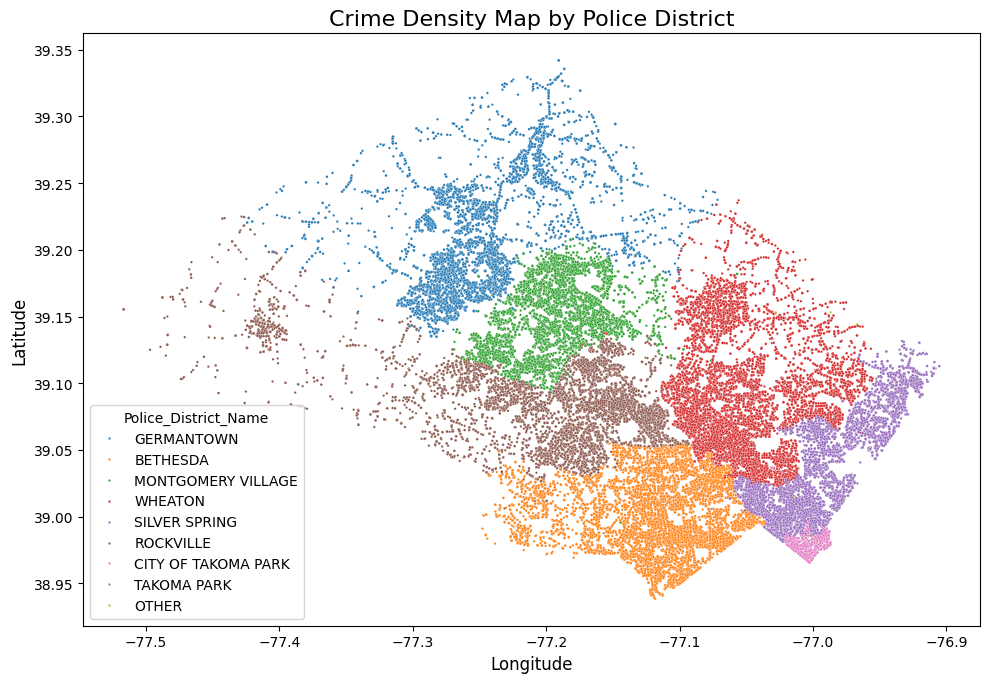

The concentration of crime within each Police District/City in the county


In [28]:


# 1. Define the valid "bounding box" to filter outliers
MIN_LAT = 38.9
MAX_LAT = 39.4
MIN_LON = -77.6
MAX_LON = -76.8

# 2. Filter the DataFrame to get only valid map points
df_map = df1[
    (df1['Latitude'] > MIN_LAT) & (df1['Latitude'] < MAX_LAT) &
    (df1['Longitude'] > MIN_LON) & (df1['Longitude'] < MAX_LON)
]

# 3. Scatter plot
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=df_map,
    x='Longitude',
    y='Latitude', hue='Police_District_Name',
    s=3,           # 's=none' indicates dot thickness
   
   
)

# 4. Titles and labels
plt.title('Crime Density Map by Police District', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.gca().set_aspect('equal') # squares the map
plt.tight_layout()
plt.show()
print('The concentration of crime within each Police District/City in the county')

## 2. Which crimes impact victims the most?

In [29]:
# Which crimes impact victims the most?
df1

,Incident_ID,Offence_Code,CR_Number,Dispatch_Date_/_Time,NIBRS_Code,Victims,Crime_Name1,Crime_Name2,Crime_Name3,Police_District_Name,...,Sector,Beat,PRA,Address_Number,Street_Name,Street_Type,Start_Date_Time,Latitude,Longitude,Police_District_Number
0,201202980,3550,180042096,2018-08-23 21:52:08,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,N,5N1,447,12800.0,MIDDLEBROOK,RD,2018-08-23 21:52:00,39.177744,-77.265619,5D
1,201181293,3522,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,E,2E2,054,8300.0,WOODMONT,AVE,2018-03-30 01:01:00,38.992693,-77.097063,2D
2,201181293,3562,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,E,2E2,054,8300.0,WOODMONT,AVE,2018-03-30 01:01:00,38.992693,-77.097063,2D
3,201193163,3520,180029476,2018-06-14 22:26:45,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,P,6P2,445,400.0,QUINCE ORCHARD,RD,2018-06-14 22:26:00,39.147954,-77.218189,6D
4,201204355,2204,180043926,2018-09-03 12:06:54,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,E,2E1,017,4800.0,FALSTONE,AVE,2018-09-02 23:30:00,38.966174,-77.096561,2D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306089,201320571,1399,210006666,2021-02-21 07:25:28,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,R,6R2,544,19300.0,TRANSHIRE,RD,2021-02-20 20:00:00,39.172701,-77.197340,6D
306090,201329875,2305,210017101,2021-05-06 22:54:47,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,K,4K2,333,12500.0,ATHERTON,DR,2021-05-06 03:15:00,39.059672,-77.075995,4D
306091,201329751,5016,210016952,2021-05-05 22:38:58,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,N,5N1,465,300.0,BALTUSROL,DR,2021-05-05 22:38:00,39.199722,-77.273039,5D
306092,201323117,9099,210009468,2021-03-13 12:07:14,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,...,G,3G1,092,7700.0,FENTON,ST,2021-03-13 13:35:00,38.985813,-77.022915,3D


In [30]:
df1['Victims'].value_counts()

Victims
1     300473
2       4762
3        576
4        188
5         57
6         17
7         14
8          4
12         2
22         1
Name: count, dtype: int64

In [31]:
df1['Victims'].describe()

count    306094.000000
mean          1.022692
std           0.192311
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          22.000000
Name: Victims, dtype: float64

In [32]:
# Crimes victims are impacted by the most
df1.groupby('Crime_Name1')['Victims'].value_counts()

Crime_Name1             Victims
Crime Against Person    1           25132
                        2            4378
                        3             524
                        4             165
                        5              45
                        7              12
                        6              11
                        8               2
                        22              1
Crime Against Property  1          139882
Crime Against Society   1           68917
Not a Crime             1            3573
                        2               2
Other                   1           62703
                        2             377
                        3              52
                        4              23
                        5              11
                        6               6
                        7               2
                        8               2
                        12              2
Name: count, dtype: int64

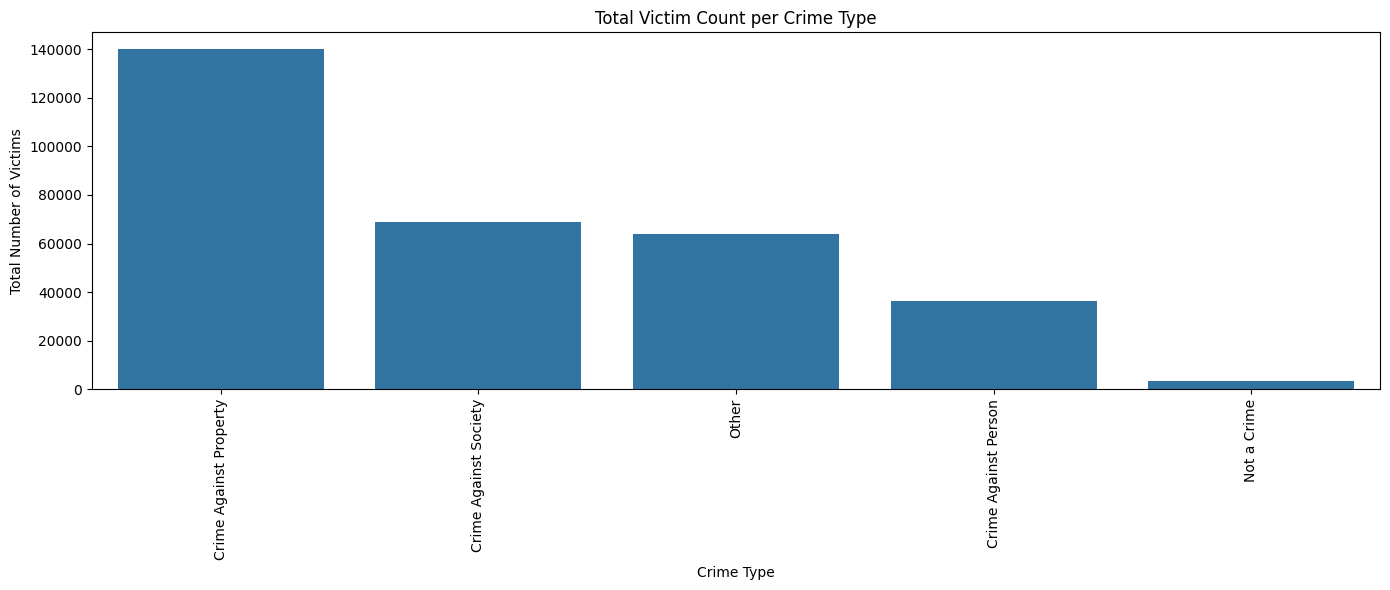

In [33]:
plt.figure(figsize=(14, 6))
crime_victim_sum = df1.groupby('Crime_Name1')['Victims'].sum().sort_values(ascending=False)

sns.barplot(                     
    x=crime_victim_sum.index,
    y=crime_victim_sum.values
)                                # Bar chart

plt.xticks(rotation=90)
plt.xlabel("Crime Type")
plt.ylabel("Total Number of Victims")
plt.title("Total Victim Count per Crime Type")
plt.tight_layout()
plt.show()


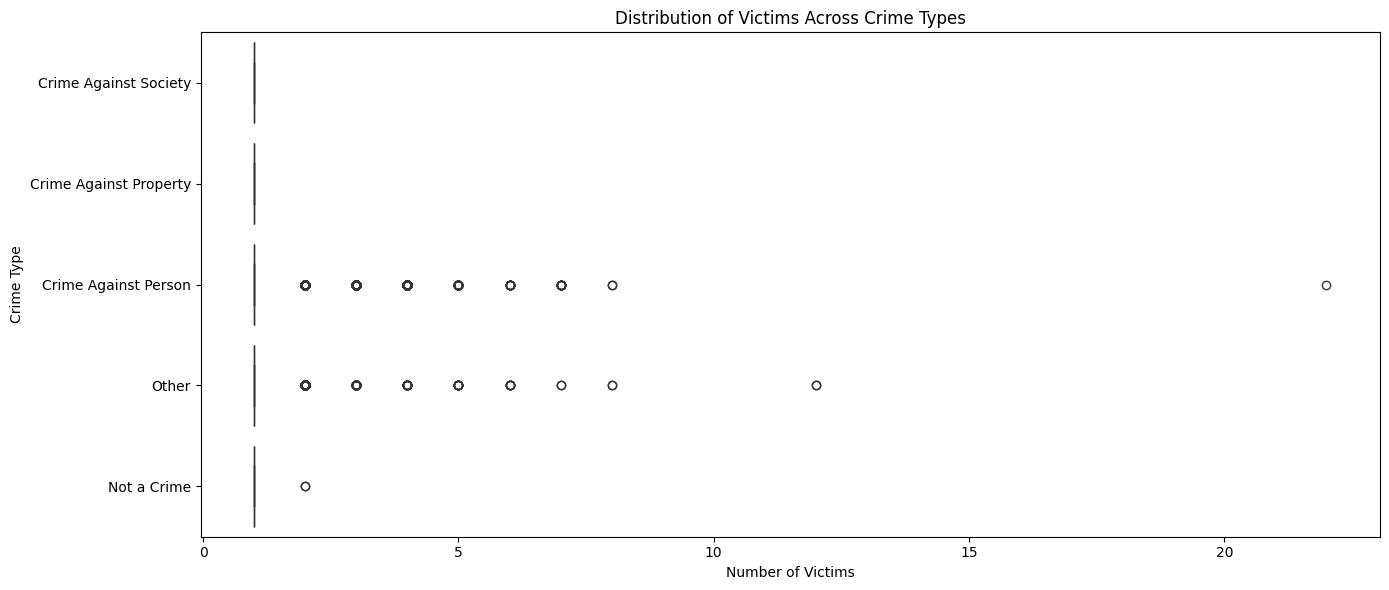

In [34]:
plt.figure(figsize=(14, 6))

sns.boxplot(
    y='Crime_Name1',
    x='Victims',
    data=df1,
    palette='Blues',
    hue='Crime_Name1',
    legend=False
)

plt.xlabel("Number of Victims")
plt.ylabel("Crime Type")
plt.title("Distribution of Victims Across Crime Types")
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution of victims of crimes across Police Districts')

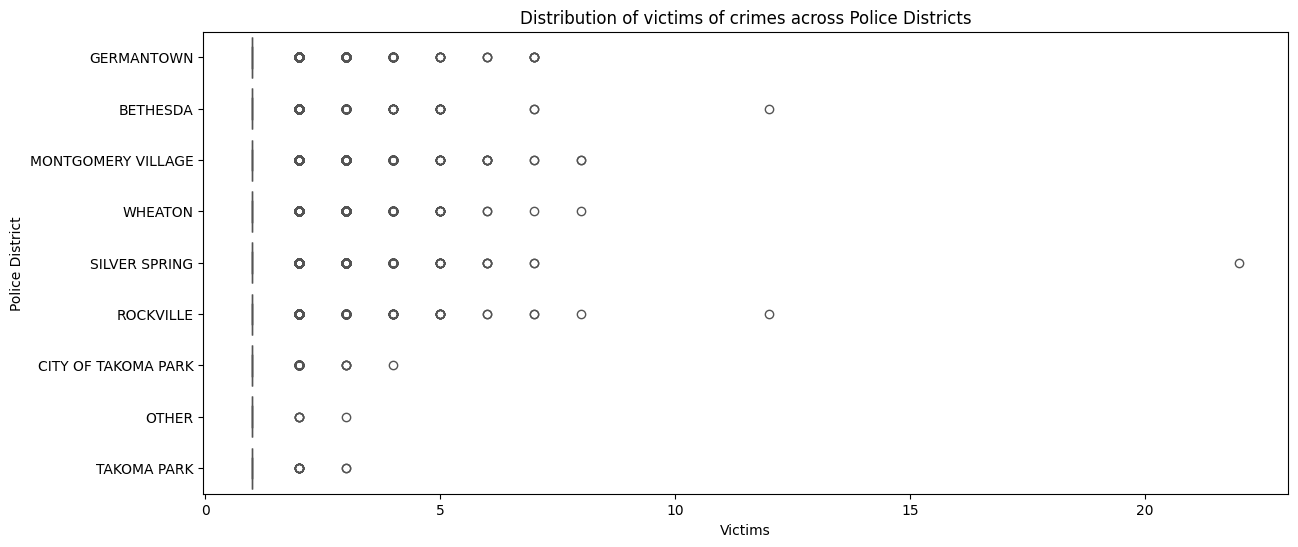

In [35]:
# Distribution of victims of crimes across Police Districts

plt.figure(figsize=(14, 6))
sns.boxplot(x='Victims', y='Police_District_Name', data=df1, palette='coolwarm', hue='Police_District_Name', legend=False)
plt.xlabel('Victims')
plt.ylabel('Police District')
plt.title('Distribution of victims of crimes across Police Districts')

Seems to be an outlier of 22 victims impacted at a go by a crime at Silver Spring

## 3. Which offence code records the highest crime entries, and which city are they occurring?


In [36]:
df1['Offence_Code'].count()

np.int64(306094)

In [37]:
df1['Offence_Code'].value_counts()  # Counts of offence codes

Offence_Code
2305    26275
9199    18489
1399    17441
2303    16076
3562    15613
        ...  
4101        1
2802        1
4999        1
1002        1
5199        1
Name: count, Length: 342, dtype: int64

In [38]:
df1['Offence_Code'].describe()

count     306094
unique       342
top         2305
freq       26275
Name: Offence_Code, dtype: object

The offence code recorded the most is 2305.

In [39]:
off_code=df1.groupby('Offence_Code')['Crime_Name1'].value_counts().sort_values(ascending=False).head(5) # Top 3 crimes by Offence Code
off_code

Offence_Code  Crime_Name1           
2305          Crime Against Property    26275
9199          Other                     18489
1399          Crime Against Person      17441
2303          Crime Against Property    16076
3562          Crime Against Society     15613
Name: count, dtype: int64

Victims suffer from crimes against property the most

Text(0, 0.5, 'Count')

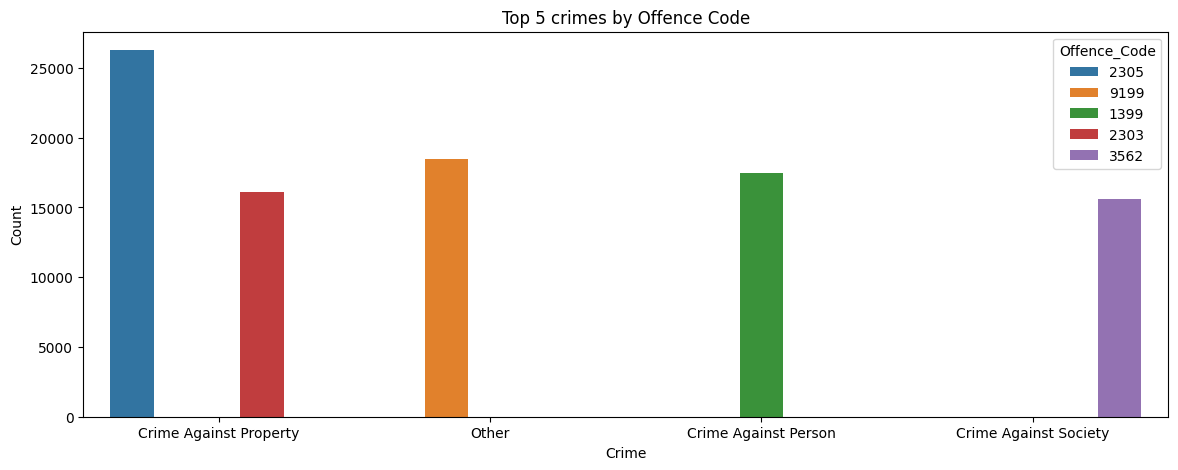

In [40]:
off_code_df=off_code.reset_index()
off_code_df.columns=['Offence_Code', 'Crime_Name1', 'Count']      # Change series to dataframe

# Bar Chart
plt.figure(figsize=(14,5))
sns.barplot(data=off_code_df, 
            x='Crime_Name1', 
            y='Count', 
            hue='Offence_Code',
           dodge=True)

plt.title('Top 5 crimes by Offence Code')
plt.xlabel('Crime')
plt.ylabel('Count')


In [41]:
off_code_df

,Offence_Code,Crime_Name1,Count
0,2305,Crime Against Property,26275
1,9199,Other,18489
2,1399,Crime Against Person,17441
3,2303,Crime Against Property,16076
4,3562,Crime Against Society,15613


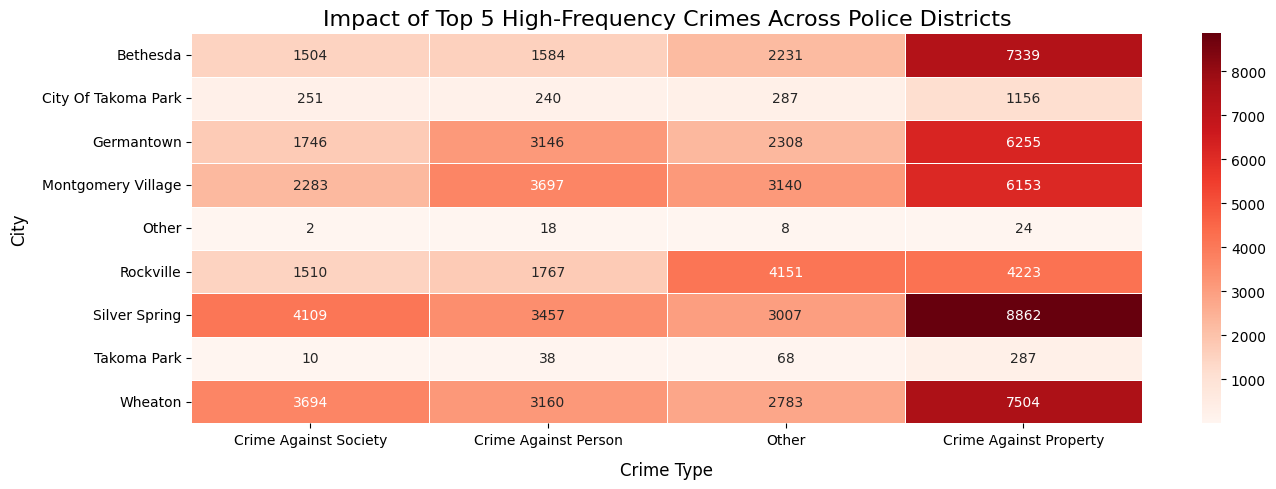

In [42]:
# Concentration of crime 

# 1. Define the valid "bounding box" to filter outliers
MIN_LAT = 38.9
MAX_LAT = 39.4
MIN_LON = -77.6
MAX_LON = -76.8

# 2. Filter the DataFrame to get only valid map points
df_map = df1[
    (df1['Latitude'] > MIN_LAT) & (df1['Latitude'] < MAX_LAT) &
    (df1['Longitude'] > MIN_LON) & (df1['Longitude'] < MAX_LON)
]

df_off_code = df_map.merge(
    off_code_df[['Offence_Code', 'Crime_Name1']],
    on=['Offence_Code', 'Crime_Name1'],
    how='inner'
)

# Clean city names
df_off_code['Police_District_Name'] = df_off_code['Police_District_Name'].str.strip().str.title()

# Pivot table
heatmap_data = df_off_code.pivot_table(
    index='Police_District_Name',
    columns='Crime_Name1',
    aggfunc='size',
    fill_value=0
)

# Select only the top 5 crimes (1D list)
top5_crimes = df_off_code['Crime_Name1'].unique().tolist()
heatmap_data = heatmap_data[top5_crimes]  # safe, 1D selection

# Optional: sort cities alphabetically
heatmap_data = heatmap_data.sort_index()

# Draw heatmap
plt.figure(figsize=(14, max(5, len(heatmap_data)*0.5)))

sns.heatmap(
    heatmap_data,
    cmap='Reds',
    linewidths=.5,
    annot=True,
    fmt='d'
)

plt.title('Impact of Top 5 High-Frequency Crimes Across Police Districts', fontsize=16)
plt.xlabel('Crime Type', fontsize=12, labelpad=10)
plt.ylabel('City', fontsize=12, labelpad=10)
plt.tight_layout()
plt.show()




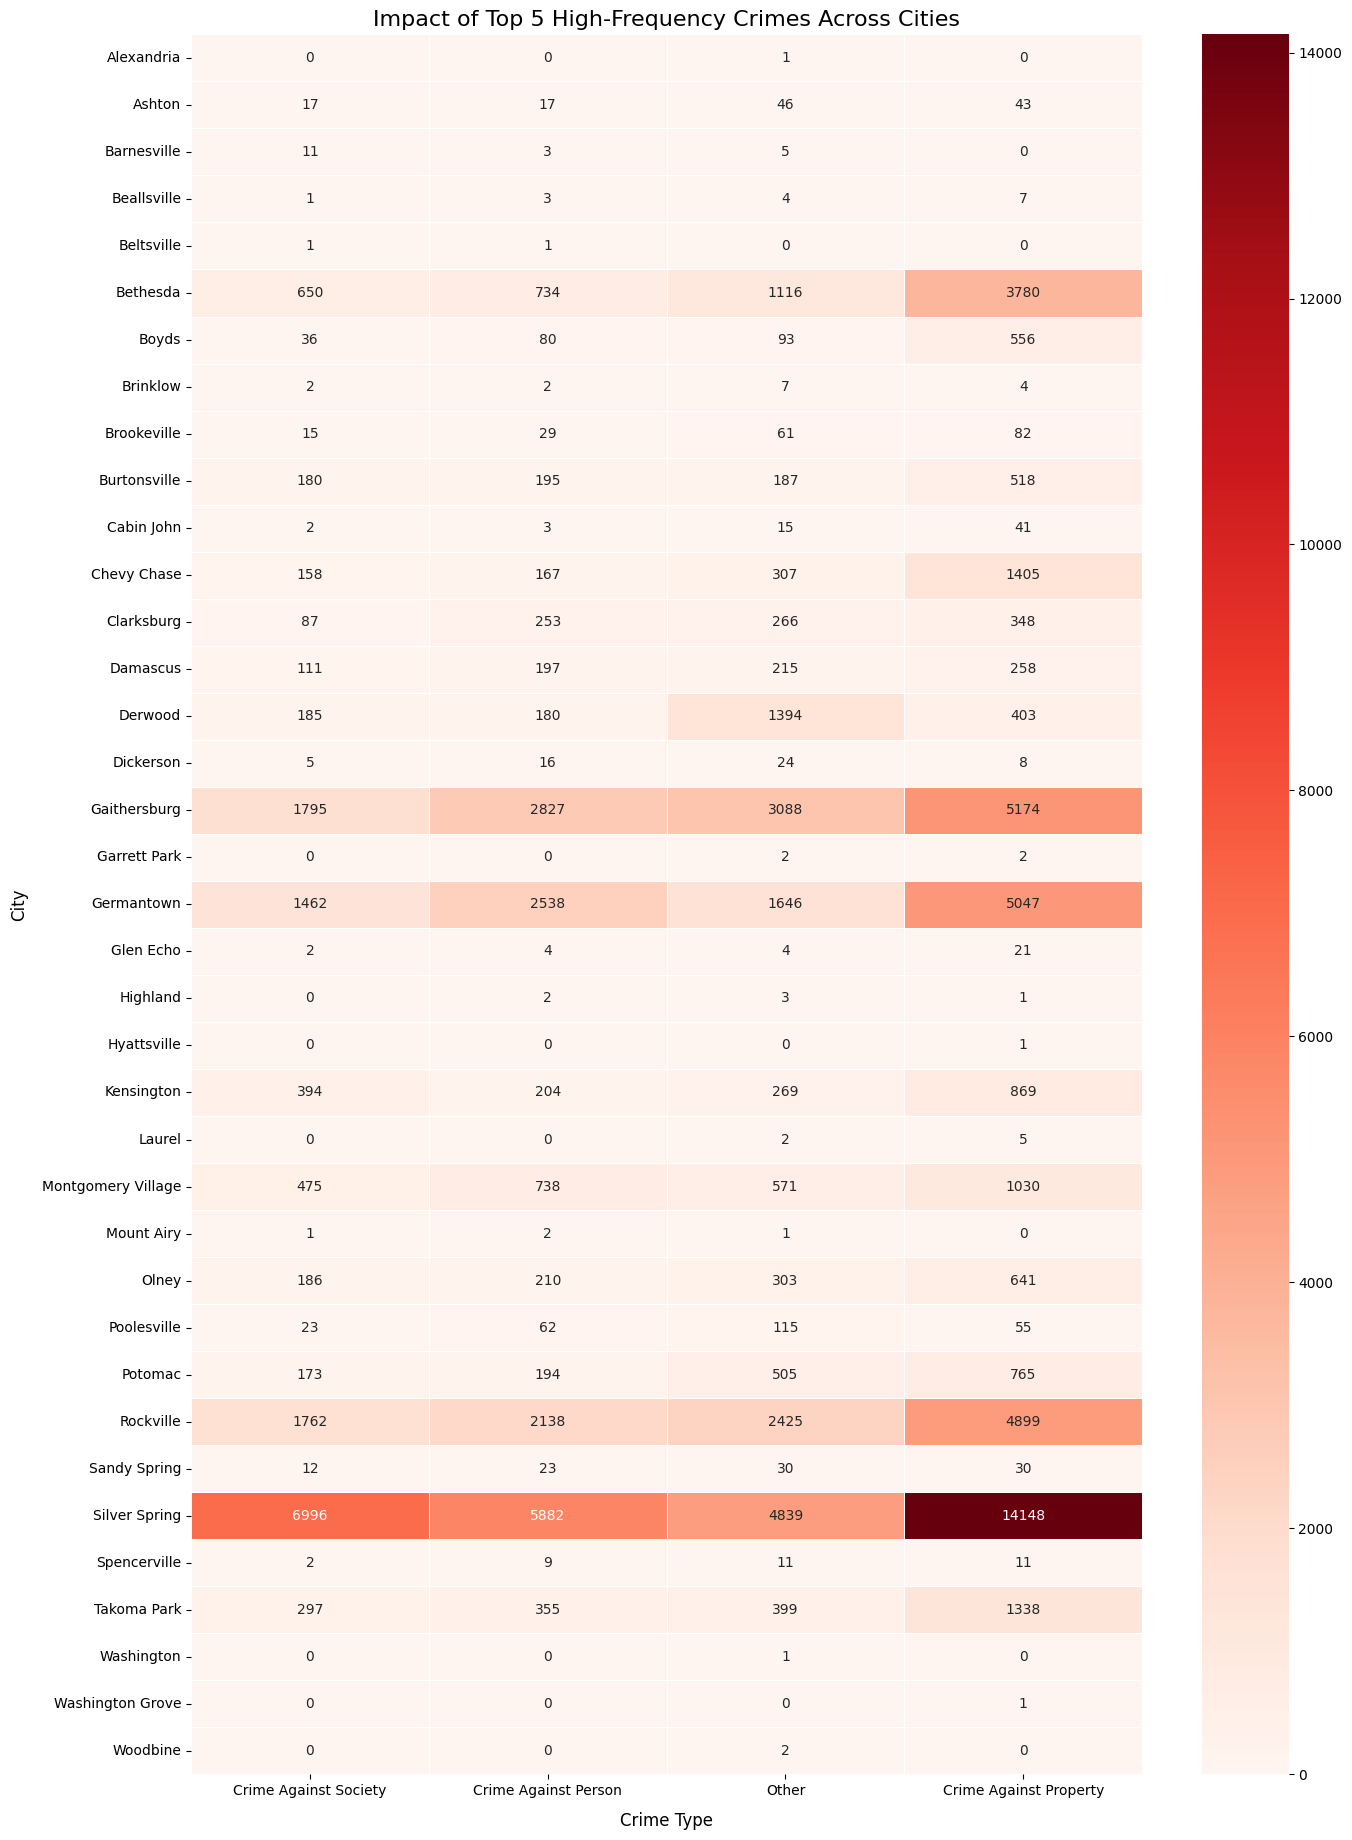

In [43]:
# Concentration of crime 

# 1. Define the valid "bounding box" to filter outliers
MIN_LAT = 38.9
MAX_LAT = 39.4
MIN_LON = -77.6
MAX_LON = -76.8

# 2. Filter the DataFrame to get only valid map points
df_map = df1[
    (df1['Latitude'] > MIN_LAT) & (df1['Latitude'] < MAX_LAT) &
    (df1['Longitude'] > MIN_LON) & (df1['Longitude'] < MAX_LON)
]

df_off_code = df_map.merge(
    off_code_df[['Offence_Code', 'Crime_Name1']],
    on=['Offence_Code', 'Crime_Name1'],
    how='inner'
)

# Clean city names
df_off_code['City'] = df_off_code['City'].str.strip().str.title()

# Pivot table
heatmap_data = df_off_code.pivot_table(
    index='City',
    columns='Crime_Name1',
    aggfunc='size',
    fill_value=0
)

# Select only the top 5 crimes (1D list)
top5_crimes = df_off_code['Crime_Name1'].unique().tolist()
heatmap_data = heatmap_data[top5_crimes]  # safe, 1D selection

# Optional: sort cities alphabetically
heatmap_data = heatmap_data.sort_index()

# Draw heatmap
plt.figure(figsize=(14, max(5, len(heatmap_data)*0.5)))

sns.heatmap(
    heatmap_data,
    cmap='Reds',
    linewidths=.5,
    annot=True,
    fmt='d'
)

plt.title('Impact of Top 5 High-Frequency Crimes Across Cities', fontsize=16)
plt.xlabel('Crime Type', fontsize=12, labelpad=10)
plt.ylabel('City', fontsize=12, labelpad=10)
plt.tight_layout()
plt.show()




In [44]:
off_code2=df1.groupby('Crime_Name2')['Place'].value_counts().sort_values(ascending=False).head(5) # Top 5 crimes by Offence Code
off_code2

Crime_Name2                  Place                      
All Other Offenses           Residence - Single Family      14638
Drug/Narcotic Violations     Street - In vehicle            12880
Driving Under the Influence  Street - In vehicle            11854
All Other Offenses           Residence - Apartment/Condo    10991
                             Other/Unknown                   8175
Name: count, dtype: int64

Text(0, 0.5, 'Count')

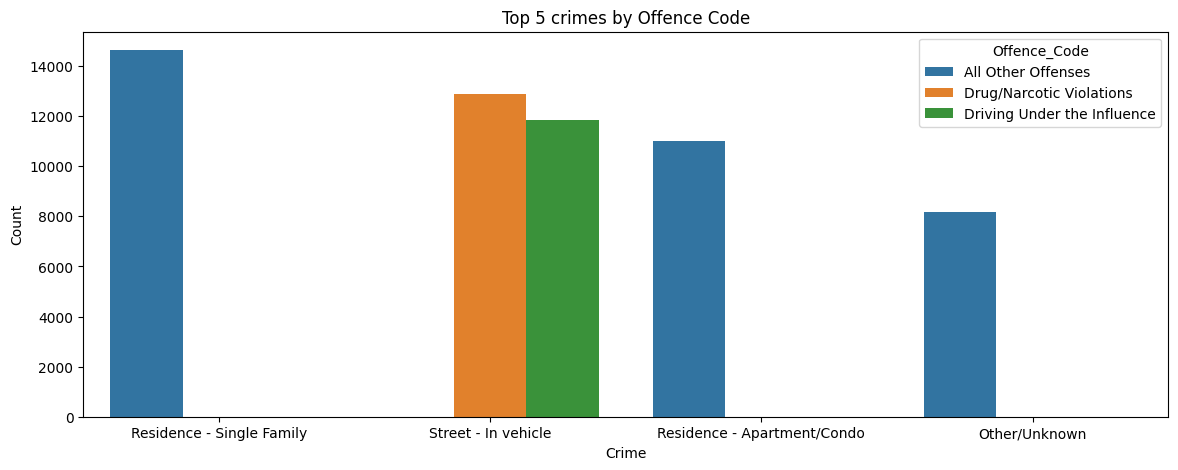

In [45]:
off_code_df2=off_code2.reset_index()
off_code_df2.columns=['Offence_Code', 'Crime_Name2', 'Count']      # Change series to dataframe

# Bar Chart
plt.figure(figsize=(14,5))
sns.barplot(data=off_code_df2, 
            x='Crime_Name2', 
            y='Count', 
            hue='Offence_Code',
           dodge=True)

plt.title('Top 5 crimes by Offence Code')
plt.xlabel('Crime')
plt.ylabel('Count')

## 4. How has the overall crime frequency evolved between 2016 and 2022, and what seasonal or monthly patterns can be observed during this period?

In [46]:
df1

,Incident_ID,Offence_Code,CR_Number,Dispatch_Date_/_Time,NIBRS_Code,Victims,Crime_Name1,Crime_Name2,Crime_Name3,Police_District_Name,...,Sector,Beat,PRA,Address_Number,Street_Name,Street_Type,Start_Date_Time,Latitude,Longitude,Police_District_Number
0,201202980,3550,180042096,2018-08-23 21:52:08,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,N,5N1,447,12800.0,MIDDLEBROOK,RD,2018-08-23 21:52:00,39.177744,-77.265619,5D
1,201181293,3522,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,E,2E2,054,8300.0,WOODMONT,AVE,2018-03-30 01:01:00,38.992693,-77.097063,2D
2,201181293,3562,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,E,2E2,054,8300.0,WOODMONT,AVE,2018-03-30 01:01:00,38.992693,-77.097063,2D
3,201193163,3520,180029476,2018-06-14 22:26:45,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,P,6P2,445,400.0,QUINCE ORCHARD,RD,2018-06-14 22:26:00,39.147954,-77.218189,6D
4,201204355,2204,180043926,2018-09-03 12:06:54,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,E,2E1,017,4800.0,FALSTONE,AVE,2018-09-02 23:30:00,38.966174,-77.096561,2D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306089,201320571,1399,210006666,2021-02-21 07:25:28,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,R,6R2,544,19300.0,TRANSHIRE,RD,2021-02-20 20:00:00,39.172701,-77.197340,6D
306090,201329875,2305,210017101,2021-05-06 22:54:47,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,K,4K2,333,12500.0,ATHERTON,DR,2021-05-06 03:15:00,39.059672,-77.075995,4D
306091,201329751,5016,210016952,2021-05-05 22:38:58,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,N,5N1,465,300.0,BALTUSROL,DR,2021-05-05 22:38:00,39.199722,-77.273039,5D
306092,201323117,9099,210009468,2021-03-13 12:07:14,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,...,G,3G1,092,7700.0,FENTON,ST,2021-03-13 13:35:00,38.985813,-77.022915,3D


In [53]:
# Determine trends across the year
df1['Year']=df1['Start_Date_Time'].dt.year  # Add a year column to the dataframe based on start date time entries

In [54]:
crime_trend=df1.groupby('Year')['Crime_Name1'].value_counts()   # Identifying crime count per year
crime_trend

Year  Crime_Name1           
2016  Crime Against Property    12435
      Crime Against Society      7812
      Other                      5156
      Crime Against Person       2498
      Not a Crime                 340
2017  Crime Against Property    24267
      Crime Against Society     15860
      Other                     10501
      Crime Against Person       4964
      Not a Crime                 683
2018  Crime Against Property    21650
      Crime Against Society     15839
      Other                     11081
      Crime Against Person       5130
      Not a Crime                 625
2019  Crime Against Property    22026
      Crime Against Society     13048
      Other                     10762
      Crime Against Person       4946
      Not a Crime                 639
2020  Crime Against Property    22945
      Other                      9805
      Crime Against Society      7127
      Crime Against Person       4423
      Not a Crime                 514
2021  Crime Against P

In [79]:
crime_trend_df=crime_trend.reset_index()     # Convert previous to dataframe
crime_trend_df.columns=['Year', 'Crime_Name1', 'Count']
crime_trend_df

,Year,Crime_Name1,Count
0,2016,Crime Against Property,12435
1,2016,Crime Against Society,7812
2,2016,Other,5156
3,2016,Crime Against Person,2498
4,2016,Not a Crime,340
5,2017,Crime Against Property,24267
6,2017,Crime Against Society,15860
7,2017,Other,10501
8,2017,Crime Against Person,4964
9,2017,Not a Crime,683


Text(0.5, 1.0, 'Crime Trends across 7 years')

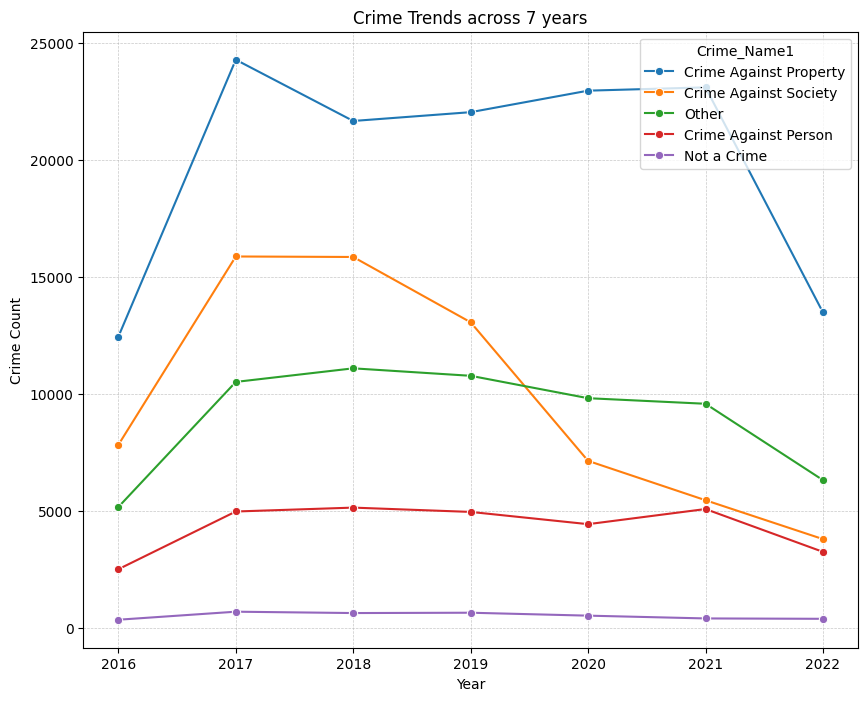

In [59]:
plt.figure(figsize=(10,8))       # Draw a line plot
sns.lineplot(data=crime_trend_df,
             x='Year',
             y='Count',
             hue='Crime_Name1',
            marker='o')
plt.grid(                        # plot grid lines to enhance visualisation
    True,            
    which='both',    
    linestyle='--',  
    linewidth=0.5,   
    alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.title('Crime Trends across 7 years')

Text(0.5, 1.0, 'Crime Trend per Month')

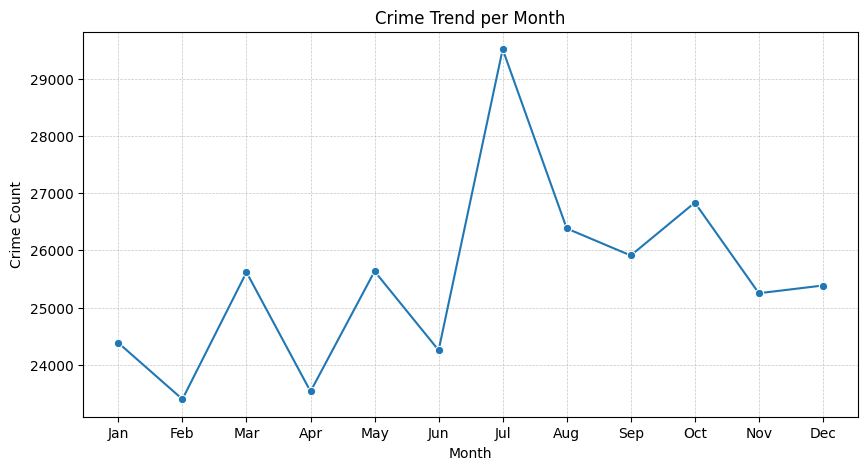

In [78]:
# Determine crime trend across months
df1['Month']=df1['Start_Date_Time'].dt.month                           # Create a month column based on start date time entries
month_count = df1['Month'].value_counts().sort_index().reset_index()   # Align months in chronological order and determine count
month_count.columns = ['Month', 'Count']                              # Rename the columns for a clean plot

months = {                                                          # Create dictionary to define month names
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
month_count['Month Name'] = month_count['Month'].map(months)      # We create a new column 'Month Name' by applying this map

plt.figure(figsize=(10,5))                                             # Draw line plot to illustrate
sns.lineplot(month_count,
            x='Month Name',
            y='Count',
            marker='o')
plt.grid(                        # Grid lines to enhance visualisation
    True,            
    which='both',    
    linestyle='--',  
    linewidth=0.5,   
    alpha=0.7)

plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.title('Crime Trend per Month')

## 5. How do major crime categories vary across cities and agencies over time, and which combinations show the strongest crime trends or anomalies?

In [81]:
df1

,Incident_ID,Offence_Code,CR_Number,Dispatch_Date_/_Time,NIBRS_Code,Victims,Crime_Name1,Crime_Name2,Crime_Name3,Police_District_Name,...,PRA,Address_Number,Street_Name,Street_Type,Start_Date_Time,Latitude,Longitude,Police_District_Number,Year,Month
0,201202980,3550,180042096,2018-08-23 21:52:08,35B,1,Crime Against Society,Drug Equipment Violations,DRUGS - NARCOTIC EQUIP - POSSESS,GERMANTOWN,...,447,12800.0,MIDDLEBROOK,RD,2018-08-23 21:52:00,39.177744,-77.265619,5D,2018,8
1,201181293,3522,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,BETHESDA,...,054,8300.0,WOODMONT,AVE,2018-03-30 01:01:00,38.992693,-77.097063,2D,2018,3
2,201181293,3562,180015424,2018-03-30 01:00:55,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,BETHESDA,...,054,8300.0,WOODMONT,AVE,2018-03-30 01:01:00,38.992693,-77.097063,2D,2018,3
3,201193163,3520,180029476,2018-06-14 22:26:45,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - SELL,MONTGOMERY VILLAGE,...,445,400.0,QUINCE ORCHARD,RD,2018-06-14 22:26:00,39.147954,-77.218189,6D,2018,6
4,201204355,2204,180043926,2018-09-03 12:06:54,220,1,Crime Against Property,Burglary/Breaking and Entering,BURGLARY - NO FORCED ENTRY-RESIDENTIAL,BETHESDA,...,017,4800.0,FALSTONE,AVE,2018-09-02 23:30:00,38.966174,-77.096561,2D,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306089,201320571,1399,210006666,2021-02-21 07:25:28,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,...,544,19300.0,TRANSHIRE,RD,2021-02-20 20:00:00,39.172701,-77.197340,6D,2021,2
306090,201329875,2305,210017101,2021-05-06 22:54:47,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,WHEATON,...,333,12500.0,ATHERTON,DR,2021-05-06 03:15:00,39.059672,-77.075995,4D,2021,5
306091,201329751,5016,210016952,2021-05-05 22:38:58,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,GERMANTOWN,...,465,300.0,BALTUSROL,DR,2021-05-05 22:38:00,39.199722,-77.273039,5D,2021,5
306092,201323117,9099,210009468,2021-03-13 12:07:14,90Z,1,Crime Against Society,All Other Offenses,ALL OTHER OFFENSES,SILVER SPRING,...,092,7700.0,FENTON,ST,2021-03-13 13:35:00,38.985813,-77.022915,3D,2021,3


In [92]:
# Identify how crime types vary across cities
city_crime=df1.groupby('City')['Crime_Name3'].value_counts().sort_values(ascending=False)
city_crime

City              Crime_Name3                                      
SILVER SPRING     LARCENY - FROM AUTO                                  8688
                  DRUGS - MARIJUANA - POSSESS                          7235
                  ASSAULT - 2ND DEGREE                                 5981
                  LARCENY - SHOPLIFTING                                5577
                  DRIVING UNDER THE INFLUENCE LIQUOR                   5313
                                                                       ... 
WHEATON           AUTO THEFT - VEHICLE THEFT                              1
WEST FRIENDSHIP   LOST PROPERTY                                           1
WASHINGTON GROVE  UNAUTHORIZED USE OF VEHICLE (INCLUDES JOY RIDING)       1
                  LARCENY - FROM AUTO                                     1
BOYDS             WEAPON - THREAT TO BURN                                 1
Name: count, Length: 3967, dtype: int64

In [94]:
city_crime_df=city_crime.reset_index()   # Change analysis above to dataframe 
city_crime_df.columns=['City', 'Crime_Name3', 'Count']
city_crime_df

,City,Crime_Name3,Count
0,SILVER SPRING,LARCENY - FROM AUTO,8688
1,SILVER SPRING,DRUGS - MARIJUANA - POSSESS,7235
2,SILVER SPRING,ASSAULT - 2ND DEGREE,5981
3,SILVER SPRING,LARCENY - SHOPLIFTING,5577
4,SILVER SPRING,DRIVING UNDER THE INFLUENCE LIQUOR,5313
...,...,...,...
3962,WHEATON,AUTO THEFT - VEHICLE THEFT,1
3963,WEST FRIENDSHIP,LOST PROPERTY,1
3964,WASHINGTON GROVE,UNAUTHORIZED USE OF VEHICLE (INCLUDES JOY RIDING),1
3965,WASHINGTON GROVE,LARCENY - FROM AUTO,1


In [112]:
# Identify the top 10 cities
top_10_cities=df1['City'].value_counts().head(10).index
top_10_cities

Index(['SILVER SPRING', 'GAITHERSBURG', 'ROCKVILLE', 'GERMANTOWN', 'BETHESDA',
       'MONTGOMERY VILLAGE', 'TAKOMA PARK', 'CHEVY CHASE', 'POTOMAC',
       'DERWOOD'],
      dtype='object', name='City')

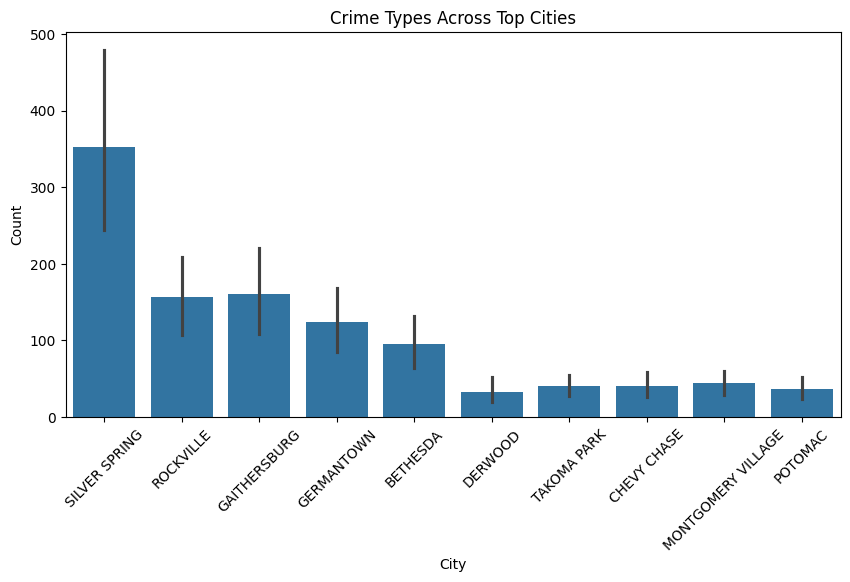

In [113]:
filtered_df = city_crime_df[city_crime_df['City'].isin(top_10_cities)]   # filter grouped data and plot

plt.figure(figsize=(10,5))
sns.barplot(
    data=filtered_df,
    x='City',
    y='Count',
    legend=False
)
plt.xticks(rotation=45)
plt.title("Crime Types Across Top Cities")
plt.show()



In [98]:
df1.groupby('Place')['Crime_Name3'].value_counts().sort_values(ascending=False)

Place                 Crime_Name3                             
Street - In vehicle   DRIVING UNDER THE INFLUENCE LIQUOR          11309
                      DRUGS - MARIJUANA - POSSESS                  9573
Residence - Driveway  LARCENY - FROM AUTO                          7334
Other/Unknown         IDENTITY THEFT                               5704
Street - Residential  LARCENY - FROM AUTO                          5667
                                                                  ...  
Wooded Area           SEX OFFENSE - INDECENT EXPOSURE TO ADULT        1
                      SEX OFFENSE - INDECENT EXPOSURE                 1
                      SEX ASSAULT - SODOMY-WOMAN-STRONG-ARM           1
                      SEX ASSAULT - SODOMY-MAN-GUN                    1
                      SEX ASSAULT - CARNAL ABUSE                      1
Name: count, Length: 7597, dtype: int64

In [91]:
df1['City'].value_counts()

City
SILVER SPRING         105488
GAITHERSBURG           44600
ROCKVILLE              42495
GERMANTOWN             30066
BETHESDA               21242
MONTGOMERY VILLAGE      9445
TAKOMA PARK             8370
CHEVY CHASE             6410
POTOMAC                 6336
DERWOOD                 5496
KENSINGTON              4824
OLNEY                   4679
BURTONSVILLE            3776
CLARKSBURG              3248
DAMASCUS                2552
BOYDS                   1968
BROOKEVILLE              919
POOLESVILLE              897
ASHTON                   419
SANDY SPRING             392
DICKERSON                292
CABIN JOHN               227
SPENCERVILLE             149
MOUNT AIRY                92
GLEN ECHO                 91
BRINKLOW                  72
LAUREL                    49
BARNESVILLE               48
BEALLSVILLE               43
WASHINGTON                23
BELTSVILLE                19
GARRETT PARK              16
HYATTSVILLE               16
WASHINGTON GROVE           9
HIGHLAND 